<a href="https://colab.research.google.com/github/Gustavo-dev04/Analise-de-dados-de-acoes-com-ia/blob/main/Coleta_e_Processamento_de_Dados/Processamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coleta e Limpeza / Visualização de dados:
## **📌 Descrição**
1. Este projeto utiliza planilhas(Google Sheets/Excel) e a linguagem R (Positive Cloud) a partir de:

- Dados estruturados (séries temporais financeiras).

## **📈 Objetivos**:

- Coletar e processar dados multimodais (numéricos + textuais).
- Visualização de dados (Google Sheets + R).
- Verificar a saúde financeira da empresa.

## **🔝 Créditos de Cursos Utilizados**
### Cursos de Análise de Dados:
- Data Analytics (Google)
- Advanced Data Analytics (Google)
- Data Analytics Cloud (Google Cloud)



#**Coleta, Limpeza e Visualizaçao de dados via Excel/Google Sheets**:

# Recursos:
- Visualizaçoes mais simples e menos tecnicas.
- Visualizaçao direta dos dados.

# Objetivo:
- Visualização para as partes interessadas.
- Analisar dados para tirar insights dos dados.
- Buscar melhoras e investimentos futuros.

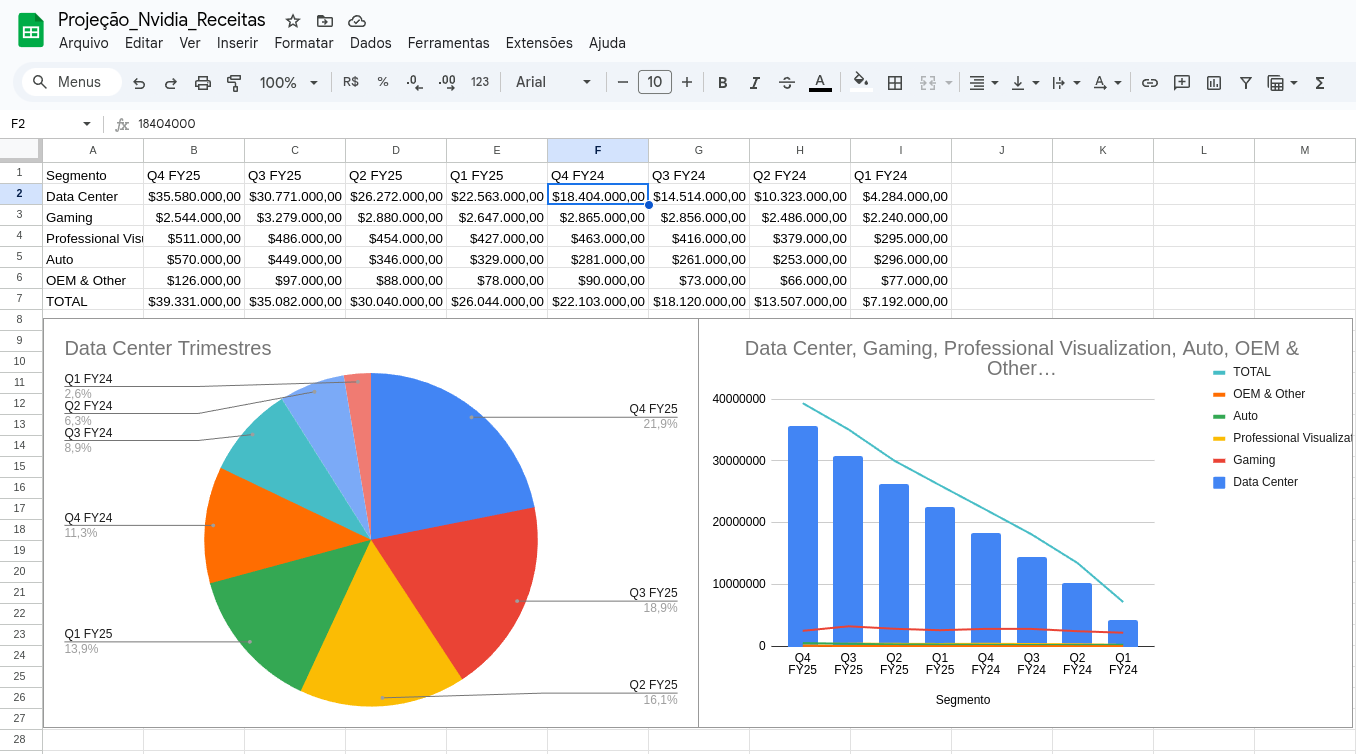

# **✅ Resultados da Análise e Visualização dos dados trimestrais da Nvidia via Excel:**
1. Data Center como o vetor principal da empresa.
2. Visualização do crescimento e da dominância do Data Center no fator financeiro da empresa.
3. Pouco tecnico, porém visualização clara
4. Possibilidade para possiveis investimentos e melhoras em outros setores.


# **Visualizaçao e Análise mais tecnica utilizando R:**
# Recursos:
- Visualizaçoes mais profissionais e tecnicas.
- Visualizaçao mais enfatica e especifica dos dados.

# Objetivo:
- Visualização para as partes interessadas.
- Analisar dados para tirar insights dos dados.
- Buscar melhoras e investimentos futuros.

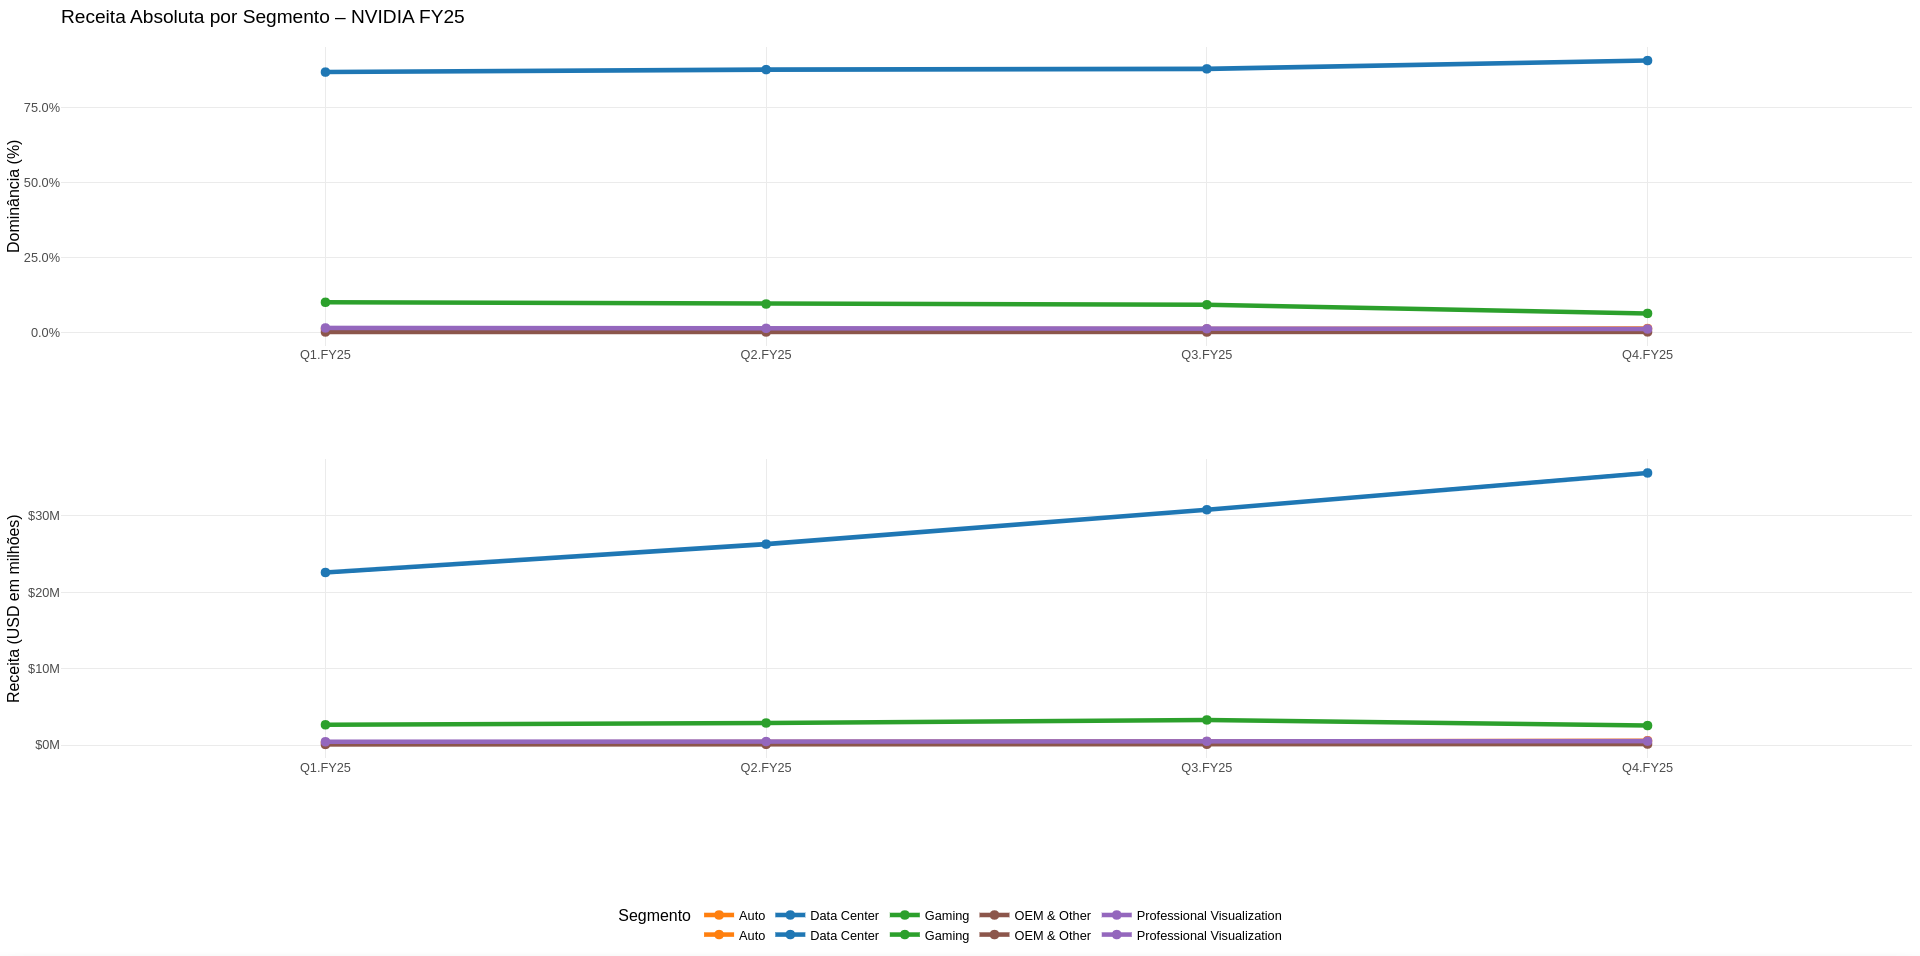

# **✅ Resultados da Análise e Visualização dos dados trimestrais da Nvidia via Rstudio:**
1. Data Center como o vetor principal da empresa.
2. Visualização do crescimento e da dominância porcentual do Data Center no fator financeiro da empresa comparando com os outros aos setores ao mesmo tempo.
3. Mais tecnico e graficos dinamicos.
4. Possivel escalonamento e atualizacao de dados.
5. Possibilidade para possiveis investimentos e melhoras em outros setores.